# Computational Methods in Simulation (CMIS) 2D toy problem

In [7]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## The 2D TOY PDE problem

Solve $\nabla^2 u - k^2 u = f$, given $k > 0$ and $f(x,y)$. Boundary conditions are von Neumann $\frac{\partial u}{\partial n} = 0$, where $n$ is normal to the boundary.

In [8]:
def generate_grid(xmin, xmax, ymin, ymax, I, J):
    dx = (xmax - xmin)/(I - 2)
    dy = (ymax - ymin)/(J - 2)
    x = np.linspace(xmin-dx/2, xmax + dx/2, I)
    y = np.linspace(ymin-dy/2, ymax + dy/2, J)
    [X, Y] = np.meshgrid(x,y)
    return [X, Y]

def matrix_assembly(k, f, grid):
    [X, Y] = grid
    I = len(X)
    J = len(Y)
    dx = X[1,1] - X[0,0]
    dy = Y[1,1] - Y[0,0]
    
    
    D = [] # Index set of all domain nodes
    G = [] # Index set of all ghost nodes

    A = np.zeros((I*J, I*J), dtype=np.float64)  # The coefficient matrix of the full system
    b = np.zeros((I*J, 1), dtype=np.float64)    # The right hand side vector the full system

    c_left  = 1/dx**2
    c_right = 1/dx**2
    c_up    = 1/dy**2
    c_down  = 1/dy**2
    c_mid   = - k**2 - 2/dx**2 - 2/dy**2

    ### INNER DOMAIN
    for j in range(1, J-1):
        for i in range(1, I-1):
            # TODO - Add code to assemble matrix A and right hand side term b using the hints below

            # Convert 2D index (i,j) into linear index space
            n = i + j*I
            D.append(n)

            # Fill in the coefficient values into A and b
            A[n, n] = c_mid
            A[n, n-1] = c_left
            A[n, n+1] = c_right
            A[n, n-I] = c_down
            A[n, n+I] = c_up
            
            b[n] = f[j, i]

    ### LEFT BOUNDARY
    i = 0
    for j in range(1,J-1):
        # TODO - Now we add the stencil for ghost node (i,j) to A and b
        ghost = i + j*I
        domain = ghost + 1
        A[ghost, ghost] = -1
        A[ghost, domain] = 1
        b[ghost] = 0
        G.append(ghost)

    ### RIGHT BOUNDARY
    i = I-1
    for j in range(1,J-1):
        # TODO - Now we add the stencil for ghost node (i,j) to A and b
        ghost = i + j*I
        domain = ghost - 1
        A[ghost, ghost] = -1
        A[ghost, domain] = 1
        b[ghost] = 0
        G.append(ghost)
        
    ### LOWER BOUNDARY
    j = 0
    for i in range(1, I-1):
        # TODO - Now we add the stencil for ghost node (i,j) to A and b
        ghost = i + j*I
        domain = ghost + I
        A[ghost, ghost] = -1
        A[ghost, domain] = 1
        b[ghost] = 0
        G.append(ghost)    

    ### UPPER BOUNDARY
    j = J-1
    for i in range(1, I-1):
        # TODO - Now we add the stencil for ghost node (i,j) to A and b
        ghost = i + j*I
        domain = ghost - I
        A[ghost, ghost] = -1
        A[ghost, domain] = 1
        b[ghost] = 0
        G.append(ghost)

    ### CORNERS
    for j in [0, J-1]:
        for i in [0, I-1]:
            ghost = I*j + i
            A[ghost, ghost] = 1
            b[ghost] = 0
            G.append(ghost)
    return A, b, D, G, I, J, dx, dy

def solve(k, f, grid):
    A, b, D, G, I, J, dx, dy = matrix_assembly(k, f, grid)
    u = np.linalg.solve(A,b)

    U = np.zeros((I, J),dtype=np.float64)
    for i in range(I):
        for j in range(J):
            n = i + I*j
            U[i,j] = u[n]
    return U

def plot_solution(U, grid, zlim = None):
    [X, Y] = grid
    I = len(X)
    J = len(Y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X[1:I-1 , 1:J-1], Y[1:I-1, 1:J-1], U[1:I-1, 1:J-1],
                    cmap="magma",
                    color='0.75',
                    rstride=1,
                    cstride=1,
                    antialiased=False)
    ax.set_title("Solution of Toy Problem")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u")
    
    if zlim is not None:
        ax.set_zlim(zlim)
    return fig, ax

In [9]:
doExp1 = False
doExp2 = False
doExp3 = False

In [10]:
if doExp1:
    [xmin, xmax] = [ymin, ymax] = [-1, 1]
    (I, J) = (100, 100)

    [X, Y] = grid = generate_grid(xmin, xmax, ymin, ymax, I, J)

    k = 100000

    f1 = X + Y
    f2 = (X)**2 - (Y)**2
    f3 = np.sin(X*2*np.pi) + np.cos(Y*2*np.pi)
    fs = [f1, f2, f3]

    for i, f in enumerate(fs):
        U = solve(k, f, grid)
        zlim = None
        if i==2:
            zlim = [-4/k**2,4/k**2]
        plot_solution(U, grid, zlim);
        plt.close()

In [11]:
if doExp2:
    [xmin, xmax] = [ymin, ymax] = [-1, 1]
    (I, J) = (100, 100)

    [X, Y] = grid = generate_grid(xmin, xmax, ymin, ymax, I, J)

    ks = [1e3, 1]

    f1 = X + Y
    f2 = np.zeros((I,J)) + 1
    f2[:I//2, J//2:] = - 1
    
    fs = [f1, f2]
    for i, f in enumerate(fs):
        for j, k in enumerate(ks):
            U = solve(k, f, grid)
            # zlim = [-4/k**2,4/k**2]
            zlim = None
            plot_solution(U, grid, zlim)
            print(f"Done with step {(j + len(ks)*i)+1}/{len(fs) * len(ks)}.")
        
        

Is: [12 23 34 45 56 67 78 89]


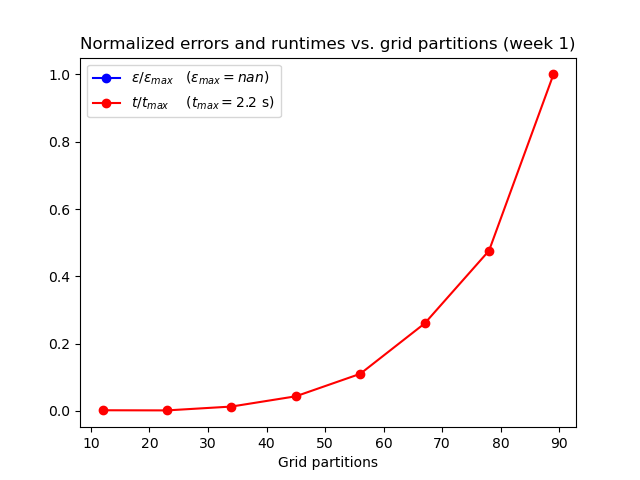

FileNotFoundError: [Errno 2] No such file or directory: 'Images/normalized_errors_runtimes_vs_grid_partitions.png'

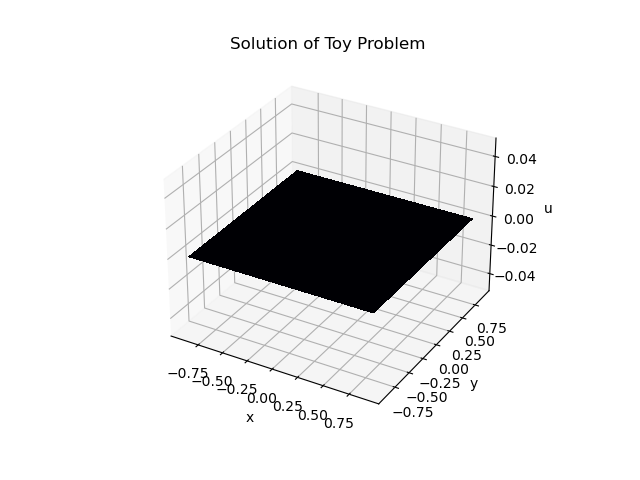

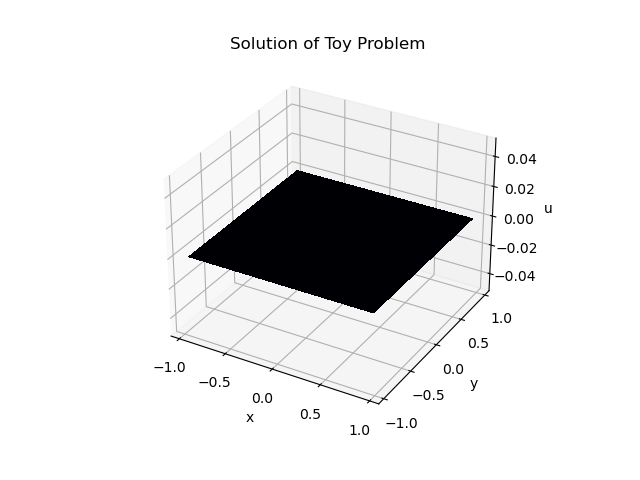

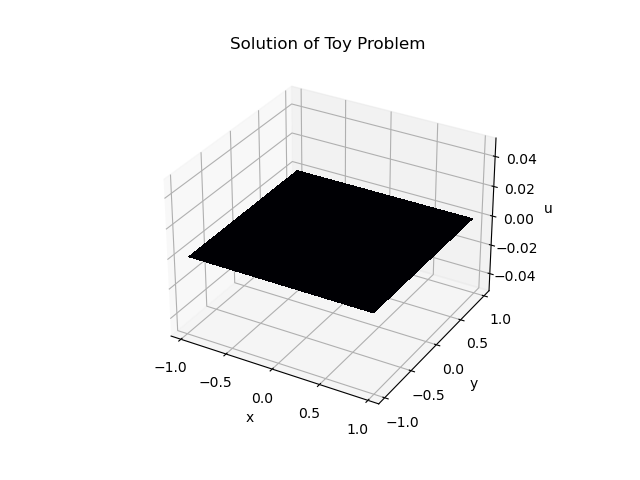

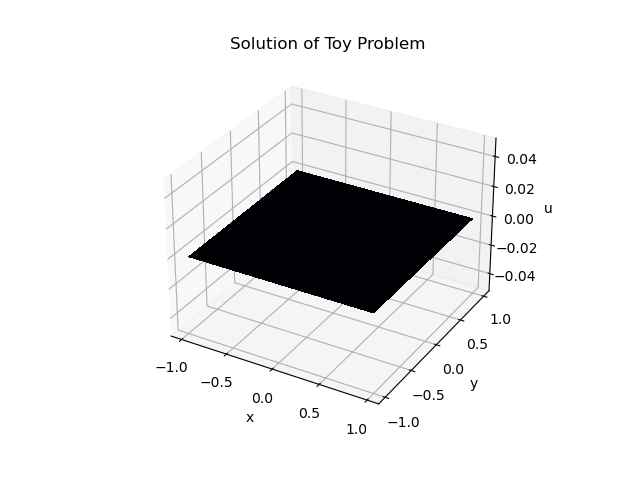

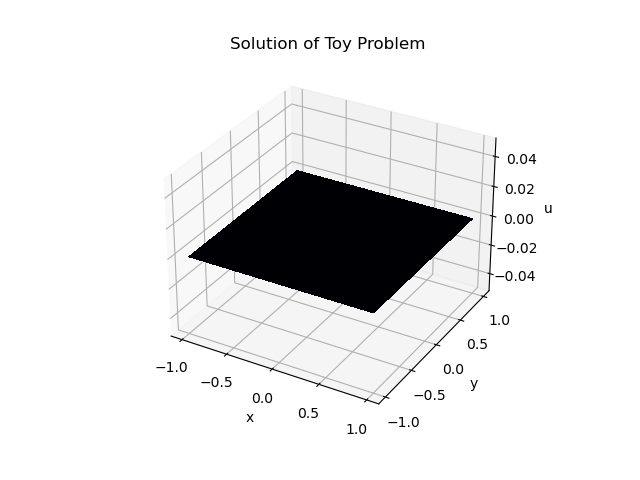

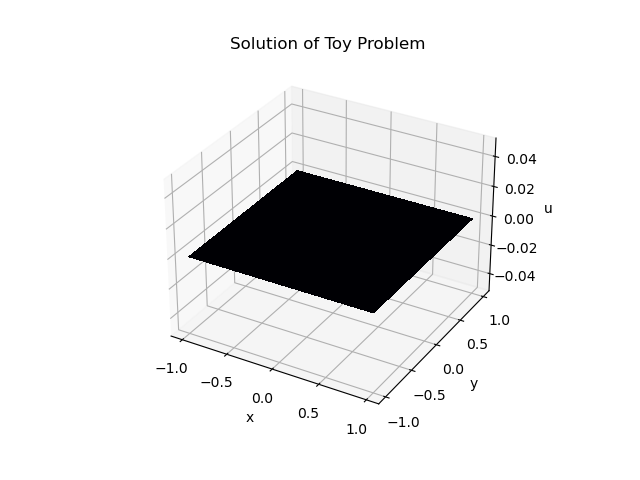

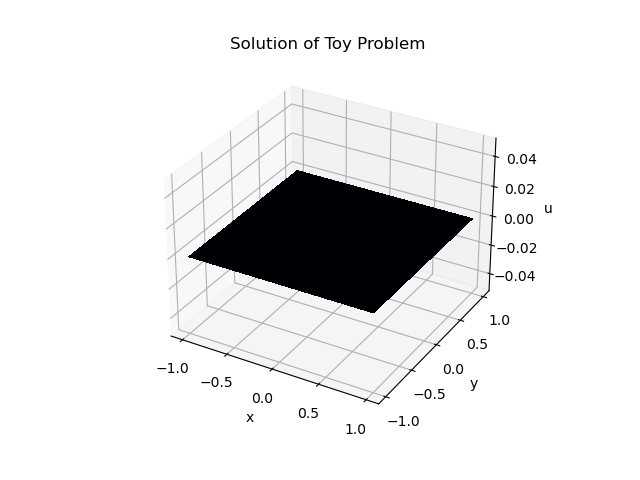

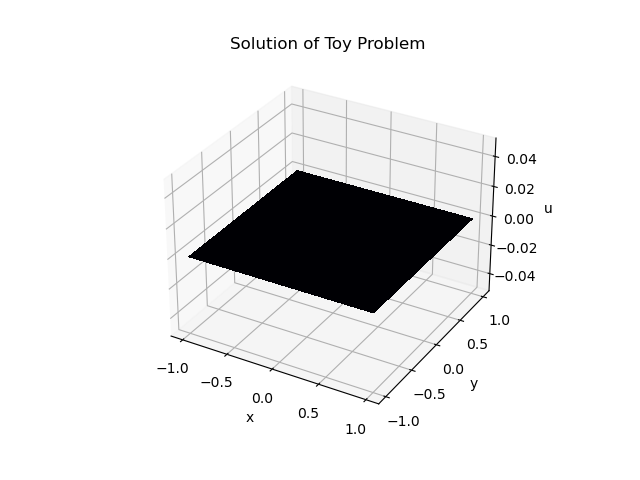

In [13]:
# if doExp3:
#     from scipy.interpolate import griddata
#     import time
#     errors = []
#     run_times = []
#     N_tests = 10
        
#     [xmin, xmax] = [ymin, ymax] = [-1, 1]
#     I = J = 100
#     [X, Y] = grid_true = generate_grid(xmin, xmax, ymin, ymax, I, J)
    
#     k = 0
#     f = np.zeros((I, J))
#     U_true = solve(k, f, grid_true)
    
#     grid_true = np.array(grid_true).reshape(I*J, 2)
#     U_true = np.array(U_true).flatten()

#     # List of values op to our true I that are not divisors of I
#     Is = np.array([i for i in np.linspace(1, I, N_tests).astype(int) if I%i != 0])
#     print(f"Is: {Is}")
#     for I in Is:
#         J = I
#         [X, Y] = grid = generate_grid(xmin, xmax, ymin, ymax, I, J)
#         start_time = time.time()
#         U = solve(k, f, grid)
#         end_time = time.time()
        
#         plot_solution(U, grid)
        
#         grid = np.array(grid).reshape(I*J, 2)
#         U = np.array(U).flatten()
        
#         U_interp = griddata(grid_true, U_true, grid, method='linear')
#         errors.append(np.linalg.norm(U - U_interp, np.inf))
#         run_times.append(end_time - start_time)
#         print(f"Error for I = {I}: {errors[-1]:.2e}", end='\r')
        
#     errors_max = np.max(errors)
#     errors_norm = np.array(errors)/errors_max
#     run_times_max = np.max(run_times)
#     run_times_norm = np.array(run_times)/run_times_max

#     fig = plt.figure()
#     plt.plot(Is, errors_norm, 'o-', color='blue', label = f'$ε/ε_{{max}}$   $(ε_{{max}} = {errors_max:.3f})$')
#     plt.plot(Is, run_times_norm, 'o-', color='red', label = f'$t/t_{{max}}$    $(t_{{max}} = {run_times_max:.1f}\ \mathrm{{s}})$')

#     plt.title("Normalized errors and runtimes vs. grid partitions (week 1)")
#     plt.xlabel("Grid partitions")
#     # plt.xticks(Is)
#     plt.legend()
#     plt.show()
#     plt.tight_layout()
    
#     # fig.savefig("Images/normalized_errors_runtimes_vs_grid_partitions.png", dpi=300)